# Summary

Using statsbomb event and 360 data, the project analyzes all cases of players receving the ball after passes in 2023/24 Bayer Leverkusen Bundesliga games. For each received pass, I define free space as a circle with a radius equal to the distance to the closest oponent. These free space circles can be plotted on 2D aerial views of the pitch to understand circumstances in which footballers receive passes, but more importantly, their areas can be calculated for entire games, allowing us to understand which players pass into the safest areas, but can also be interpreted as a metric describing the intensity of team pressing.


## Code

First I import the necessary packages and explore the sb repo

In [1]:
import numpy as np
import pandas as pd
from statsbombpy import sb

In [5]:
sb.competitions()

/Users/pawel/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


I decided to go with the free dataset of Bayer Leverkusen's 23/24 Bundesliga season, as it contains league data, 34 matches and is from a league I personally follow

In [6]:
sb.matches(competition_id=9, season_id=281)

/Users/pawel/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
5,3895286,2024-03-30,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Hoffenheim,2,1,available,...,2024-05-08T03:36:21.320065,27,Regular Season,BayArena,Deniz Aytekin,Xabier Alonso Olano,Pellegrino Matarazzo,1.1.0,2,2
6,3895220,2024-02-03,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Darmstadt 98,Bayer Leverkusen,0,2,available,...,2024-05-08T01:01:15.978489,20,Regular Season,Merck-Stadion am Böllenfalltor,Tobias Reichel,Torsten Lieberknecht,Xabier Alonso Olano,1.1.0,2,2
7,3895250,2024-02-23,21:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,FSV Mainz 05,2,1,available,...,2024-05-08T00:38:33.864825,23,Regular Season,BayArena,Timo Gerach,Xabier Alonso Olano,Bo Henriksen,1.1.0,2,2
8,3895266,2024-03-10,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Wolfsburg,2,0,available,...,2024-04-28T10:29:53.455142,25,Regular Season,BayArena,Daniel Siebert,Xabier Alonso Olano,Niko Kovač,1.1.0,2,2
9,3895275,2024-03-17,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Freiburg,Bayer Leverkusen,2,3,available,...,2024-04-19T22:39:18.935666,26,Regular Season,Europa-Park Stadion,Harm Osmers,Christian Streich,Xabier Alonso Olano,1.1.0,2,2


The idea is to work with events and frame data at the same time - the way this is done in the sb data, frames tables always contain a foregin key that can be matched to the events data. As an effect, every time there is an event on the pitch, we can check the position of all (or almost all) players at that moment. I started exploring the game against Werder Bremen (id = 3895153), 28th row in the dataframe from above

In [87]:
events = pd.read_json('/Users/pawel/Documents/Python/football-analytics/StatsbombEvents/open-data-master/data/events/3895302.json')
frames = pd.read_json('/Users/pawel/Documents/Python/football-analytics/StatsbombEvents/open-data-master/data/three-sixty/3895302.json')
df=pd.merge(events, frames, how="left", left_on='id', right_on='event_uuid')
df

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,foul_won,clearance,ball_recovery,foul_committed,block,substitution,bad_behaviour,event_uuid,visible_area,freeze_frame
0,794ec549-5288-4d1a-93e8-0fc6d3968784,1,1,2025-03-07 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 904, 'name': 'Bayer Leverkusen'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3a9a2c57-b177-47ed-9447-11f081b0e388,2,1,2025-03-07 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 904, 'name': 'Bayer Leverkusen'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1f956a2b-ece0-475b-8802-e82ed922c307,3,1,2025-03-07 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 904, 'name': 'Bayer Leverkusen'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79b90fbb-2cfd-419b-90f4-f0e5980c47d3,4,1,2025-03-07 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 904, 'name': 'Bayer Leverkusen'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,221b0c8d-6386-4ae8-bb4a-a1dc98742312,5,1,2025-03-07 00:00:03.417,0,3,"{'id': 30, 'name': 'Pass'}",2,"{'id': 176, 'name': 'Werder Bremen'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,e75b1a76-8aca-461f-846f-70b8b9e35fa9,4219,2,2025-03-07 00:44:22.844,89,22,"{'id': 17, 'name': 'Pressure'}",143,"{'id': 904, 'name': 'Bayer Leverkusen'}","{'id': 6, 'name': 'From Counter'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e75b1a76-8aca-461f-846f-70b8b9e35fa9,"[22.276926886049278, 63.11238533650263, 0.0, 3...","[{'teammate': True, 'actor': False, 'keeper': ..."
4219,dcc0c591-7ebd-4e42-8206-04bfefa94f33,4220,2,2025-03-07 00:44:25.079,89,25,"{'id': 16, 'name': 'Shot'}",143,"{'id': 904, 'name': 'Bayer Leverkusen'}","{'id': 6, 'name': 'From Counter'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dcc0c591-7ebd-4e42-8206-04bfefa94f33,"[107.44543913198896, 80.0, 81.22861686199415, ...","[{'teammate': False, 'actor': False, 'keeper':..."
4220,c079bf98-61b4-48b4-8b66-f3f0c1aa19f3,4221,2,2025-03-07 00:44:25.897,89,25,"{'id': 23, 'name': 'Goal Keeper'}",143,"{'id': 904, 'name': 'Bayer Leverkusen'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c079bf98-61b4-48b4-8b66-f3f0c1aa19f3,"[14.800386241648312, 73.50858687991604, 0.0, 5...","[{'teammate': True, 'actor': True, 'keeper': T..."
4221,7a06d06e-2b12-4518-86e3-b0ee0484a065,4222,2,2025-03-07 00:44:52.108,89,52,"{'id': 34, 'name': 'Half End'}",143,"{'id': 904, 'name': 'Bayer Leverkusen'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here let's see what a single row in that dataframe looks like: timestamps, event types, player responsible for that action and, most importantly, coordinates of other players in the freeze_frame column

In [94]:
df.iloc[33]

id                              b8ea5d17-518b-4f87-86cf-557d57345a23
index                                                             34
period                                                             1
timestamp                                 2025-03-07 00:00:19.820000
minute                                                             0
second                                                            19
type                                      {'id': 30, 'name': 'Pass'}
possession                                                         3
possession_team              {'id': 904, 'name': 'Bayer Leverkusen'}
play_pattern                       {'id': 1, 'name': 'Regular Play'}
team                         {'id': 904, 'name': 'Bayer Leverkusen'}
duration                                                    2.232857
tactics                                                          NaN
related_events     [76ebbb25-3467-413b-8497-f3e38f998e57, cd206d6...
player                         {'i

The data can be plotted on a pitch for any event. The code below creates a 2D plot of the pitch using a custom pyplot function, marks all the players (Bayer in red, Werder in green) and also shows a mapping of what part of the pitch was visible to the camera (here it's worth noting that statsbomb uses an OCR process on a video and then translates that to 2D coordinates. Because of that, players who were not in the camera's field of view are not mapped - that usually concerns goalkeepers).

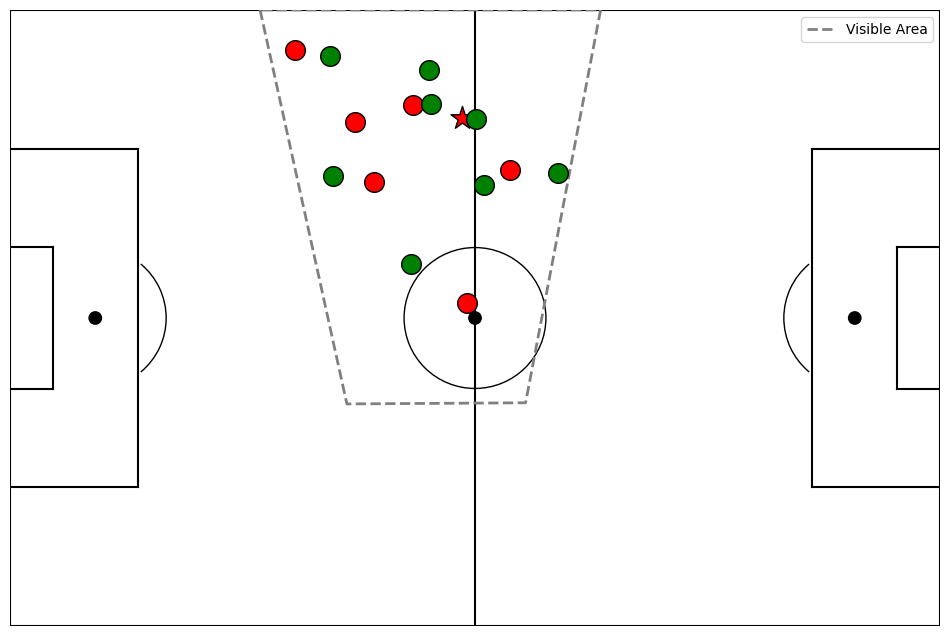

In [89]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Circle


# I create the function that plots the pitch, 120 x 80 meters

def createPitch():

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1)

    plt.plot([0, 0], [0, 80], color="black")
    plt.plot([0, 120], [80, 80], color="black")
    plt.plot([120, 120], [80, 0], color="black")
    plt.plot([120, 0], [0, 0], color="black")
    
    plt.plot([60, 60], [0, 80], color="black")

    plt.plot([16.5, 16.5], [62, 18], color="black")
    plt.plot([0, 16.5], [62, 62], color="black")
    plt.plot([16.5, 0], [18, 18], color="black")
    
    plt.plot([120, 103.5], [62, 62], color="black")
    plt.plot([103.5, 103.5], [62, 18], color="black")
    plt.plot([103.5, 120], [18, 18], color="black")
    
    six_yard_box_height = 18.32
    y_top_6 = 40 + six_yard_box_height/2
    y_bot_6 = 40 - six_yard_box_height/2
    plt.plot([0, 5.5], [y_top_6, y_top_6], color="black")
    plt.plot([5.5, 5.5], [y_top_6, y_bot_6], color="black")
    plt.plot([5.5, 0], [y_bot_6, y_bot_6], color="black")
    
    plt.plot([120, 114.5], [y_top_6, y_top_6], color="black")
    plt.plot([114.5, 114.5], [y_top_6, y_bot_6], color="black")
    plt.plot([114.5, 120], [y_bot_6, y_bot_6], color="black")
    
    centreCircle = plt.Circle((60, 40), 9.15, color="black", fill=False)
    centreSpot = plt.Circle((60, 40), 0.8, color="black")
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    
    leftPenSpot = plt.Circle((11, 40), 0.8, color="black")
    rightPenSpot = plt.Circle((109, 40), 0.8, color="black")
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    leftArc = Arc((11, 40), height=18.3, width=18.3, angle=0, theta1=310, theta2=50, color="black")
    rightArc = Arc((109, 40), height=18.3, width=18.3, angle=0, theta1=130, theta2=230, color="black")
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    plt.xlim(0, 120)
    plt.ylim(0, 80)
    plt.axis('off')
    
    return fig, ax

fig, ax = createPitch()


# now I can plot the visible area

visible_area = df.iloc[21]['visible_area']

visible_area_pairs = [(visible_area[i], visible_area[i+1]) for i in range(0, len(visible_area), 2)]

if visible_area_pairs[0] != visible_area_pairs[-1]:
    visible_area_pairs.append(visible_area_pairs[0])

x_visible = [p[0] for p in visible_area_pairs]
y_visible = [p[1] for p in visible_area_pairs]

ax.plot(x_visible, y_visible, linestyle='--', color='grey', linewidth=2, label='Visible Area')


# and here I plot all the players

freeze_data = df.iloc[21]['freeze_frame']

for player in freeze_data:
    
    x, y = player['location']

    color = 'red' if player['teammate'] else 'green'
    
    if player['actor']:
        marker = '*'
        size = 300
    else:
        marker = 'o'
        size = 200
        
    ax.scatter(x, y, s=size, c=color, marker=marker, edgecolors='black', zorder=5)

plt.legend(loc='upper right')
plt.show()


Now, to the fun part: we can easily search through the 4520 rows for all ball receipts - ball receipts are the situations where a player receives a pass from a teammate. Usually, if row n in the dataframe is a pass, then row n+1 is a ball receipt. We can do the following with the data (in this example let's use row 11 where Palacios received the ball):
1. Plot the pitch
2. Plot all the players, marking Bayer as red and Werder as green spots
3. For the player that receives the ball (defined in the player column), we can plot a circle around him, which will have the radius equal the distance to the closest opponent. This circle will be defined as free space at the moment of receiving the pass

Free space area around the actor: 338.47 square units


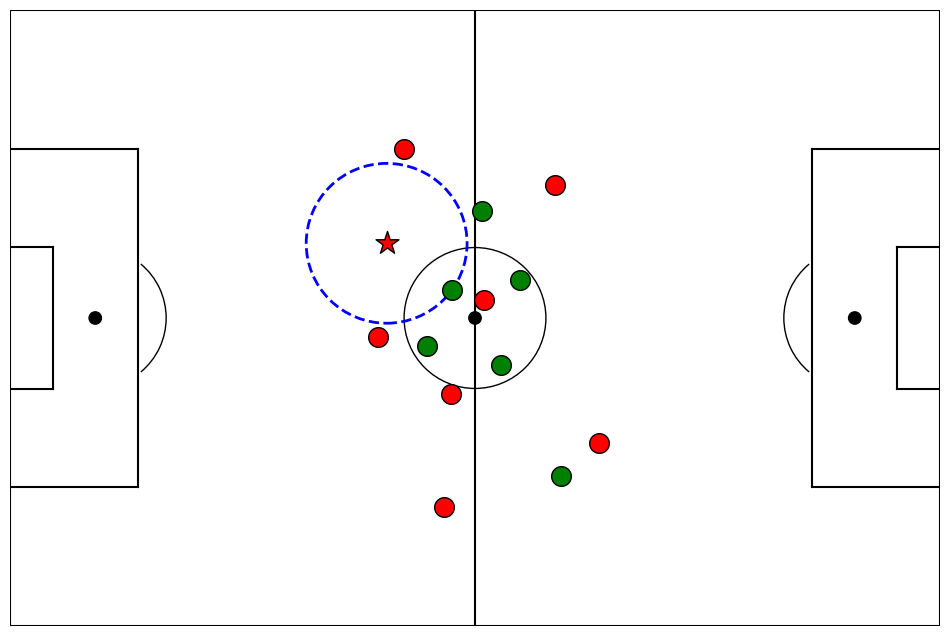

In [95]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Circle


# I create the function that plots the pitch, 120 x 80 meters
def createPitch():

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1)

    plt.plot([0, 0], [0, 80], color="black")
    plt.plot([0, 120], [80, 80], color="black")
    plt.plot([120, 120], [80, 0], color="black")
    plt.plot([120, 0], [0, 0], color="black")
    
    plt.plot([60, 60], [0, 80], color="black")

    plt.plot([16.5, 16.5], [62, 18], color="black")
    plt.plot([0, 16.5], [62, 62], color="black")
    plt.plot([16.5, 0], [18, 18], color="black")
    
    plt.plot([120, 103.5], [62, 62], color="black")
    plt.plot([103.5, 103.5], [62, 18], color="black")
    plt.plot([103.5, 120], [18, 18], color="black")
    
    six_yard_box_height = 18.32
    y_top_6 = 40 + six_yard_box_height/2
    y_bot_6 = 40 - six_yard_box_height/2
    plt.plot([0, 5.5], [y_top_6, y_top_6], color="black")
    plt.plot([5.5, 5.5], [y_top_6, y_bot_6], color="black")
    plt.plot([5.5, 0], [y_bot_6, y_bot_6], color="black")
    
    plt.plot([120, 114.5], [y_top_6, y_top_6], color="black")
    plt.plot([114.5, 114.5], [y_top_6, y_bot_6], color="black")
    plt.plot([114.5, 120], [y_bot_6, y_bot_6], color="black")
    
    centreCircle = plt.Circle((60, 40), 9.15, color="black", fill=False)
    centreSpot = plt.Circle((60, 40), 0.8, color="black")
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    
    leftPenSpot = plt.Circle((11, 40), 0.8, color="black")
    rightPenSpot = plt.Circle((109, 40), 0.8, color="black")
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    leftArc = Arc((11, 40), height=18.3, width=18.3, angle=0, theta1=310, theta2=50, color="black")
    rightArc = Arc((109, 40), height=18.3, width=18.3, angle=0, theta1=130, theta2=230, color="black")
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    plt.xlim(0, 120)
    plt.ylim(0, 80)
    plt.axis('off')
    
    return fig, ax

fig, ax = createPitch()



# from here I start the work with coordinates. First I pull the data,
# and then I loop over the array to get everyone's position

freeze_data = df.iloc[46]['freeze_frame']
actor_x, actor_y = None, None
opponent_positions = []

for player in freeze_data:

    x, y = player['location']

    color = 'red' if player['teammate'] else 'green'
    
    if player['actor']:
        actor_x, actor_y = x, y
        marker = '*'
        size = 300
    else:
        marker = 'o'
        size = 200

    if not player['teammate']:
        opponent_positions.append((x, y))
    
    ax.scatter(x, y, s=size, c=color, marker=marker, edgecolors='black', zorder=5)



# now I can define the "circle of free space". Let's first compute the euclidian distance to all opponents,
# then I can find the lowest one, and plot a circle using it

if actor_x is not None and actor_y is not None and opponent_positions:
    
    distances = [np.sqrt((actor_x - opp_x)**2 + (actor_y - opp_y)**2) for opp_x, opp_y in opponent_positions]

    min_distance = min(distances)

    free_space = np.pi * (min_distance ** 2)

    actor_circle = Circle((actor_x, actor_y), min_distance, color='blue', fill=False, linestyle="--", linewidth=2)
    ax.add_patch(actor_circle)

    print(f"Free space area around the actor: {free_space:.2f} square units")

    
plt.show()


This exercise can be of course repeated for every ball receipt in that match. This should tell me the following: who received the ball in the tightest space, who received the ball while being the furthest from any opponent, and finally, who, on average, hadd the most free space around him. Additionally, we can append the results with passing_player from the row above, to also get a sense of who "generated" the most and least comfortable pass reception situations

Note that for the pass with smallest space, the passing_player is Bittencourt from Werder Bremen and the player is Xhaka. This is an obvious mistake (either not every n-1 row is a pass or sb treats misplaced passes to opponents as regular passes, hard to say)

In [86]:
free_space_data = []

# let's iterate over the df to find Ball Receipt events

for index, row in df.iterrows():
    if row['type'] == {'id': 42, 'name': 'Ball Receipt*'} and index > 0:
        
        event_id = row['id']
        timestamp = row['timestamp']
        team = row['team']['name']  if isinstance(row['player'], dict) else None
        player_name = row['player']['name'] if isinstance(row['player'], dict) else None
        freeze_data = row['freeze_frame']

        # here I assume that if the n th row is a receipt, then n-1 th row is a pass
        previous_row = df.iloc[index - 1]
        passing_player = previous_row['player']['name'] if isinstance(previous_row['player'], dict) else None
        
        if isinstance(freeze_data, list):
            
            actor_x, actor_y = None, None
            opponent_positions = []
            
            for player in freeze_data:
                x, y = player['location']
                
                if player.get('actor', False):  
                    actor_x, actor_y = x, y
                
                if not player['teammate']:
                    opponent_positions.append((x, y))
            
            if actor_x is not None and opponent_positions:
                distances = [np.sqrt((actor_x - opp_x)**2 + (actor_y - opp_y)**2) for opp_x, opp_y in opponent_positions]
                min_distance = min(distances) if distances else 0
                free_space = np.pi * (min_distance ** 2)
            else:
                free_space = np.nan
            
            free_space_data.append({
                "id": event_id,
                "timestamp": timestamp,
                "team": team,
                "player": player_name,
                "passing_player": passing_player,
                "free_space": free_space
            })

free_space_df = pd.DataFrame(free_space_data)

# let's find the ball receipt with the smallest and largest free space
smallest_free_space = free_space_df.loc[free_space_df['free_space'].idxmin()]
largest_free_space = free_space_df.loc[free_space_df['free_space'].idxmax()]


print("Ball receipt with the smallest free space:")
print(smallest_free_space)

print("\nBall receipt with the largest free space:")
print(largest_free_space)


free_space_df

Ball receipt with the smallest free space:
id                b24889f6-a0e0-4cea-ab62-f2153b8df249
timestamp                   2025-03-07 00:10:28.991000
team                                  Bayer Leverkusen
player                                Jeremie Frimpong
passing_player                        Jeremie Frimpong
free_space                                    0.121743
Name: 645, dtype: object

Ball receipt with the largest free space:
id                e0fefddc-cd59-40de-ae36-56d7823ef321
timestamp                   2025-03-07 00:00:03.232000
team                                     Bayern Munich
player                                    Sven Ulreich
passing_player                            Serge Gnabry
free_space                                 3688.283896
Name: 534, dtype: object


,id,timestamp,team,player,passing_player,free_space
0,b306ec30-5755-4017-861a-670617955a41,2025-03-07 00:00:01.363,Bayer Leverkusen,Odilon Kossonou,Granit Xhaka,690.287061
1,4f14f36d-c3c1-45d5-9c94-a65f9489d40f,2025-03-07 00:00:04.154,Bayer Leverkusen,Edmond Fayçal Tapsoba,Odilon Kossonou,667.460707
2,39fe9846-f889-4790-956c-d8df633e77d5,2025-03-07 00:00:07.147,Bayer Leverkusen,Robert Andrich,Edmond Fayçal Tapsoba,127.075477
3,9d075ad4-9f9f-4e6f-a093-5919a1a920b3,2025-03-07 00:00:09.247,Bayer Leverkusen,Jonathan Tah,Robert Andrich,155.935215
4,7913f543-9fcd-488e-84d6-8a14f0455694,2025-03-07 00:00:11.680,Bayer Leverkusen,Lukáš Hrádecký,Harry Kane,282.373780
...,...,...,...,...,...,...
1056,68b7afce-bb7c-4e94-b7df-a6362d950dc4,2025-03-07 00:51:40.831,Bayern Munich,Mathys Tel,Jamal Musiala,116.737153
1057,de363943-101e-439f-8bda-328d12f889ef,2025-03-07 00:51:44.818,Bayern Munich,Alphonso Davies,Mathys Tel,124.705444
1058,d68a9ca0-4816-4d9c-ae74-975f42310e7a,2025-03-07 00:52:17.769,Bayern Munich,Jean-Eric Maxim Choupo-Moting,Leroy Sané,10.817382
1059,27f3fc27-5ebc-4b64-bdfe-c8dee6579018,2025-03-07 00:52:21.709,Bayern Munich,Leon Goretzka,Jamal Musiala,2.765196


This means that I can also group the results by player or passing_player, to see the average per footballer. I decided to group by passing_player, to try to understand if the data will tell me something unexpected about space creation. Seemingly, the defensive players and goalkeepers seem to have lead the rank. This is to be expected, since:
1. during goal kicks and playing out from the back, there is a chance that the other team decides to sit low
2. they would be more risk averse since a loss of ball would mean a scoring chance
3. the strikers and attacking midfielders operate in the tightest spaces around the penalty area

In [81]:
mean_free_space_by_passer = free_space_df.groupby(['passing_player', 'team'])['free_space'].mean().reset_index()
mean_free_space_by_passer.columns = ['passing_player', 'team', 'mean_free_space']
mean_free_space_by_passer = mean_free_space_by_passer.sort_values(by='mean_free_space', ascending=False)

mean_free_space_by_passer

,passing_player,team,mean_free_space
26,Lukáš Hrádecký,Bayer Leverkusen,687.078072
28,Michael Zetterer,Werder Bremen,411.481409
30,Milos Veljkovic,Werder Bremen,344.416217
23,Julián Malatini,Werder Bremen,331.327422
4,Christian Groß,Werder Bremen,325.093466
37,Odilon Kossonou,Bayer Leverkusen,323.097442
49,Senne Lynen,Werder Bremen,311.893926
33,Nathan Tella,Bayer Leverkusen,292.491934
27,Marvin Ducksch,Werder Bremen,282.171479
25,Leonardo Bittencourt,Werder Bremen,277.347783


We can of course repeat the same exercise for other games, for example for Bayern vs Bayer, to see if there are meaningful changes in average passing spaces. Here, interestingly, Choupo-Moting somehow lands at the top, but I suspect he came on for only a few minutes and maybe received one or two passes in very comfortable areas

In [85]:
events = pd.read_json('/Users/pawel/Documents/Python/football-analytics/StatsbombEvents/open-data-master/data/events/3895074.json')
frames = pd.read_json('/Users/pawel/Documents/Python/football-analytics/StatsbombEvents/open-data-master/data/three-sixty/3895074.json')
df=pd.merge(events, frames, how="left", left_on='id', right_on='event_uuid')

free_space_data = []

for index, row in df.iterrows():
    if row['type'] == {'id': 42, 'name': 'Ball Receipt*'} and index > 0:
        
        event_id = row['id']
        timestamp = row['timestamp']
        team = row['team']['name']  if isinstance(row['player'], dict) else None
        player_name = row['player']['name'] if isinstance(row['player'], dict) else None
        freeze_data = row['freeze_frame']

        previous_row = df.iloc[index - 1]
        passing_player = previous_row['player']['name'] if isinstance(previous_row['player'], dict) else None
        
        if isinstance(freeze_data, list):
            
            actor_x, actor_y = None, None
            opponent_positions = []
            
            for player in freeze_data:
                x, y = player['location']
                
                if player.get('actor', False):  
                    actor_x, actor_y = x, y
                
                if not player['teammate']:
                    opponent_positions.append((x, y))
            
            if actor_x is not None and opponent_positions:
                distances = [np.sqrt((actor_x - opp_x)**2 + (actor_y - opp_y)**2) for opp_x, opp_y in opponent_positions]
                min_distance = min(distances) if distances else 0
                free_space = np.pi * (min_distance ** 2)
            else:
                free_space = np.nan
            
            free_space_data.append({
                "id": event_id,
                "timestamp": timestamp,
                "team": team,
                "player": player_name,
                "passing_player": passing_player,
                "free_space": free_space
            })

free_space_df = pd.DataFrame(free_space_data)

mean_free_space_by_passer = free_space_df.groupby(['passing_player', 'team'])['free_space'].mean().reset_index()
mean_free_space_by_passer.columns = ['passing_player', 'team', 'mean_free_space']
mean_free_space_by_passer = mean_free_space_by_passer.sort_values(by='mean_free_space', ascending=False)

mean_free_space_by_passer

,passing_player,team,mean_free_space
20,Jean-Eric Maxim Choupo-Moting,Bayern Munich,802.409490
34,Lukáš Hrádecký,Bayer Leverkusen,471.929795
7,Dayotchanculle Upamecano,Bayern Munich,448.047070
28,Joshua Kimmich,Bayern Munich,355.361363
47,Serge Gnabry,Bayern Munich,353.905175
40,Min Jae Kim,Bayern Munich,328.584061
4,Alphonso Davies,Bayern Munich,301.597875
16,Harry Kane,Bayer Leverkusen,282.373780
38,Matthijs de Ligt,Bayern Munich,272.994383
32,Leon Goretzka,Bayern Munich,269.653294


This, however, led me to think: what if we iterate over the entire season and group the results by team? After all, the results should show me, who presses at the highest intensitivity. Such a team should in theory leave the least average space for the recipient of the ball (i.e., be the quickest to jump to the player that is supposed to receive the pass). Let's iterate over all the games from the initial dataframe and group by team.

In [105]:
import pandas as pd
import numpy as np
import os


EVENTS_PATH = "/Users/pawel/Documents/Python/football-analytics/StatsbombEvents/open-data-master/data/events/"
FRAMES_PATH = "/Users/pawel/Documents/Python/football-analytics/StatsbombEvents/open-data-master/data/three-sixty/"

match_ids = league["match_id"].unique()
all_match_team_free_space = []

# let's iterate through each match
for match_id in match_ids:
    
    events_file = os.path.join(EVENTS_PATH, f"{match_id}.json")
    frames_file = os.path.join(FRAMES_PATH, f"{match_id}.json")
    
    if os.path.exists(events_file) and os.path.exists(frames_file):
        
        events = pd.read_json(events_file)
        frames = pd.read_json(frames_file)

        df = pd.merge(events, frames, how="left", left_on="id", right_on="event_uuid")

        teams_in_match = df["team"].dropna().apply(lambda x: x["name"] if isinstance(x, dict) else None).unique()

        if len(teams_in_match) != 2:
            continue 

        team_a, team_b = teams_in_match 
        free_space_data = []

        # and here we iterate over individual match dataframes to find Ball Receipt events
        for index, row in df.iterrows():
            if row["type"] == {"id": 42, "name": "Ball Receipt*"} and index > 0:
                
                event_id = row["id"]
                timestamp = row["timestamp"]
                team_name = row["team"]["name"] if isinstance(row["team"], dict) else None
                freeze_data = row["freeze_frame"]

                opponent_team = team_b if team_name == team_a else team_a

                previous_row = df.iloc[index - 1]
                passing_player = previous_row["player"]["name"] if isinstance(previous_row["player"], dict) else None
                
                
                if isinstance(freeze_data, list):
                    actor_x, actor_y = None, None
                    opponent_positions = []
                    
                    for player in freeze_data:
                        x, y = player["location"]
                    
                        if player.get("actor", False):  
                            actor_x, actor_y = x, y
                        
                        if not player["teammate"]:
                            opponent_positions.append((x, y))

                    if actor_x is not None and opponent_positions:
                        distances = [np.sqrt((actor_x - opp_x)**2 + (actor_y - opp_y)**2) for opp_x, opp_y in opponent_positions]
                        min_distance = min(distances) if distances else 0
                        free_space = np.pi * (min_distance ** 2)
                    else:
                        free_space = np.nan  
                    

                    free_space_data.append({
                        "match_id": match_id,
                        "opponent_team": opponent_team, 
                        "free_space": free_space
                    })

        match_free_space_df = pd.DataFrame(free_space_data)

        if not match_free_space_df.empty:
            mean_free_space_by_team = match_free_space_df.groupby("opponent_team")["free_space"].mean().reset_index()
            mean_free_space_by_team["match_id"] = match_id  
            all_match_team_free_space.append(mean_free_space_by_team)

# combining everything
league_free_space_df = pd.concat(all_match_team_free_space, ignore_index=True)
league_team_free_space = league_free_space_df.groupby("opponent_team")["free_space"].mean().reset_index()
league_team_free_space.columns = ["team", "mean_free_space"]

league_team_free_space.sort_values(by='mean_free_space', ascending=True)

,team,mean_free_space
15,VfB Stuttgart,166.070535
2,Bayern Munich,191.969385
8,FC Heidenheim,193.481680
13,RB Leipzig,195.734619
0,Augsburg,196.726984
17,Wolfsburg,204.591807
16,Werder Bremen,204.611248
5,Borussia Mönchengladbach,205.166915
10,FSV Mainz 05,205.392112
4,Borussia Dortmund,206.655234


As we can see in the results, Stuttgart under Hoeneß were the closest in closing gaps to opponents on the pitch. A high position of Bayern and Leipzig was also to be expected, although Heidenheim surprised me here a bit. Also, it's worth noting that Leverkusen end up being second to last, which in my opinion does not pass the eye test. My expectation is that this is due to the fact that the dataset is heavily non-normalized, as there are 34 games of data for Bayer, but only 2 for every other team.

In [106]:
import pandas as pd
import numpy as np
import os


EVENTS_PATH = "/Users/pawel/Documents/Python/football-analytics/StatsbombEvents/open-data-master/data/events/"
FRAMES_PATH = "/Users/pawel/Documents/Python/football-analytics/StatsbombEvents/open-data-master/data/three-sixty/"

match_ids = league["match_id"].unique()
all_match_team_free_space = []

# let's iterate through each match
for match_id in match_ids:
    
    events_file = os.path.join(EVENTS_PATH, f"{match_id}.json")
    frames_file = os.path.join(FRAMES_PATH, f"{match_id}.json")
    
    if os.path.exists(events_file) and os.path.exists(frames_file):
        
        events = pd.read_json(events_file)
        frames = pd.read_json(frames_file)

        df = pd.merge(events, frames, how="left", left_on="id", right_on="event_uuid")

        teams_in_match = df["team"].dropna().apply(lambda x: x["name"] if isinstance(x, dict) else None).unique()

        if len(teams_in_match) != 2:
            continue 

        team_a, team_b = teams_in_match 
        free_space_data = []

        # and here we iterate over individual match dataframes to find Ball Receipt events
        for index, row in df.iterrows():
            if row["type"] == {"id": 42, "name": "Ball Receipt*"} and index > 0:
                
                event_id = row["id"]
                timestamp = row["timestamp"]
                team_name = row["team"]["name"] if isinstance(row["team"], dict) else None
                freeze_data = row["freeze_frame"]

                opponent_team = team_b if team_name == team_a else team_a

                previous_row = df.iloc[index - 1]
                passing_player = previous_row["player"]["name"] if isinstance(previous_row["player"], dict) else None
                
                
                if isinstance(freeze_data, list):
                    actor_x, actor_y = None, None
                    opponent_positions = []
                    
                    for player in freeze_data:
                        x, y = player["location"]
                    
                        if player.get("actor", False):  
                            actor_x, actor_y = x, y
                        
                        if not player["teammate"]:
                            opponent_positions.append((x, y))

                    if actor_x is not None and opponent_positions:
                        distances = [np.sqrt((actor_x - opp_x)**2 + (actor_y - opp_y)**2) for opp_x, opp_y in opponent_positions]
                        min_distance = min(distances) if distances else 0
                        free_space = np.pi * (min_distance ** 2)
                    else:
                        free_space = np.nan  
                    

                    free_space_data.append({
                        "match_id": match_id,
                        "opponent_team": opponent_team, 
                        "free_space": free_space
                    })

        match_free_space_df = pd.DataFrame(free_space_data)

        if not match_free_space_df.empty:
            mean_free_space_by_team = match_free_space_df.groupby("opponent_team")["free_space"].mean().reset_index()
            mean_free_space_by_team["match_id"] = match_id  
            all_match_team_free_space.append(mean_free_space_by_team)

# combining everything
league_free_space_df = pd.concat(all_match_team_free_space, ignore_index=True)
league_team_free_space = league_free_space_df.groupby("opponent_team")["free_space"].median().reset_index()
league_team_free_space.columns = ["team", "median_free_space"]

league_team_free_space.sort_values(by='median_free_space', ascending=True)

,team,median_free_space
15,VfB Stuttgart,166.070535
2,Bayern Munich,191.969385
8,FC Heidenheim,193.481680
13,RB Leipzig,195.734619
0,Augsburg,196.726984
17,Wolfsburg,204.591807
16,Werder Bremen,204.611248
5,Borussia Mönchengladbach,205.166915
10,FSV Mainz 05,205.392112
4,Borussia Dortmund,206.655234
